In [1]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import json

# Analysis

In [2]:
with open('../yelp_json/yelp_academic_dataset_review.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

reviews=pd.DataFrame(data)

In [3]:
with open('../yelp_json/yelp_academic_dataset_business.json', 'r') as f:
    data = f.readlines()

In [4]:
# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)


data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
business = pd.read_json(data_json_str)

In [5]:
del(data)
del(data_json_str)

In [6]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'RestaurantsReservations': 'True', 'Restauran...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Tuesday': '11:0-21:0', 'Thursday': '11:0-21:...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'RestaurantsReservations': 'False', 'BikePark...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'RestaurantsReservations': 'True', 'BikeParki...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Tuesday': '10:0-22:0', 'Thursday': '10:0-22:...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [7]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [8]:
business.categories=business.categories.astype('str')

In [9]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 411.8+ MB


In [11]:
rcParams["figure.figsize"] = [16,8]

## Top Business

### positive

In [12]:
top_reviewed_business = reviews[reviews["stars"]>3]
top_reviews_dict ={}

for business_id in top_reviewed_business["business_id"].values:
    try :
        top_reviews_dict[business_id] =top_reviews_dict[business_id]+1
    except:
        top_reviews_dict[business_id]=1
        
topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict,orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'stars']
del(top_reviews_dict)
del(top_reviewed_business)

Text(0, 0.5, 'Total stars')

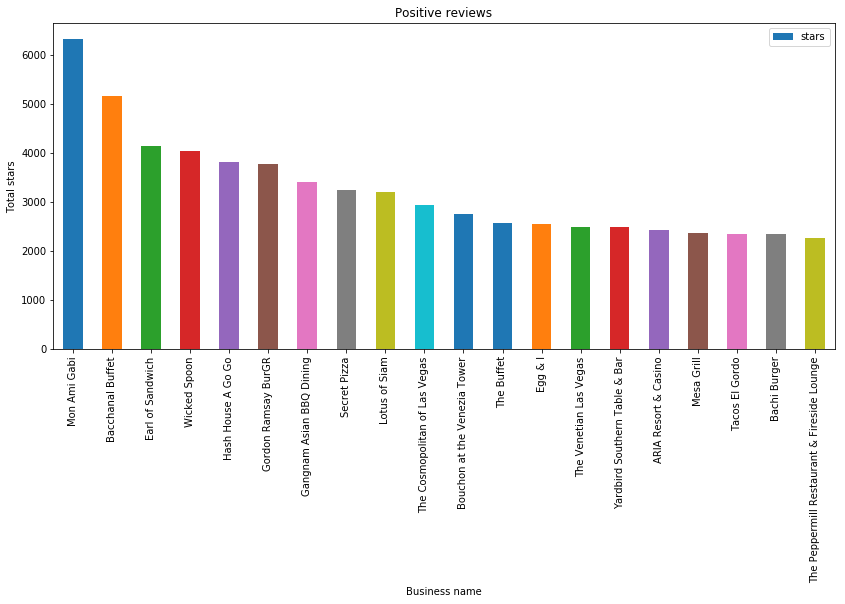

In [13]:
right=pd.DataFrame(business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

top_business_data = pd.merge(topbusiness,right=right, how="inner",on='business_id')
top_business_data.sort_values("stars")[::-1][:20].plot(x="Business name",y="stars", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total stars")



### Negative

In [14]:
top_negative_reviewed_business = reviews[reviews["stars"]<3]
top_negative_reviews_dict ={}

for business_id in top_negative_reviewed_business["business_id"].values:
    try :
        top_negative_reviews_dict[business_id] =top_negative_reviews_dict[business_id]+1
    except:
        top_negative_reviews_dict[business_id]=1
        
negativebusiness = pd.DataFrame.from_dict(data= top_negative_reviews_dict,orient="index")

negativebusiness.reset_index(inplace=True)
negativebusiness.columns = ['business_id', 'stars']
del(top_negative_reviews_dict)
del(top_negative_reviewed_business)

Text(0, 0.5, 'Total stars')

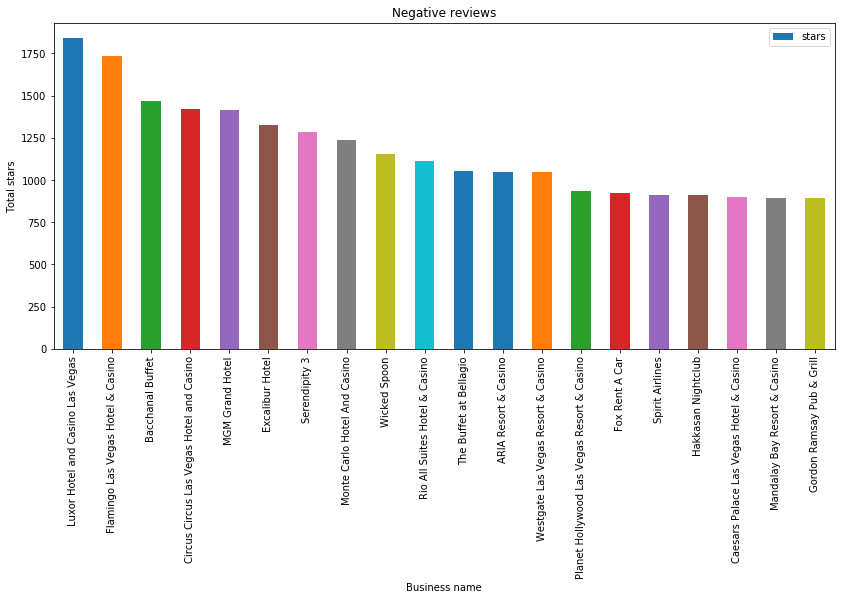

In [15]:
right=pd.DataFrame(business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

negative_business_data = pd.merge(negativebusiness,right=right, how="inner",on='business_id')
negative_business_data.sort_values("stars")[::-1][:20].plot(x="Business name",y="stars", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Negative reviews').set_ylabel("Total stars")



## top category

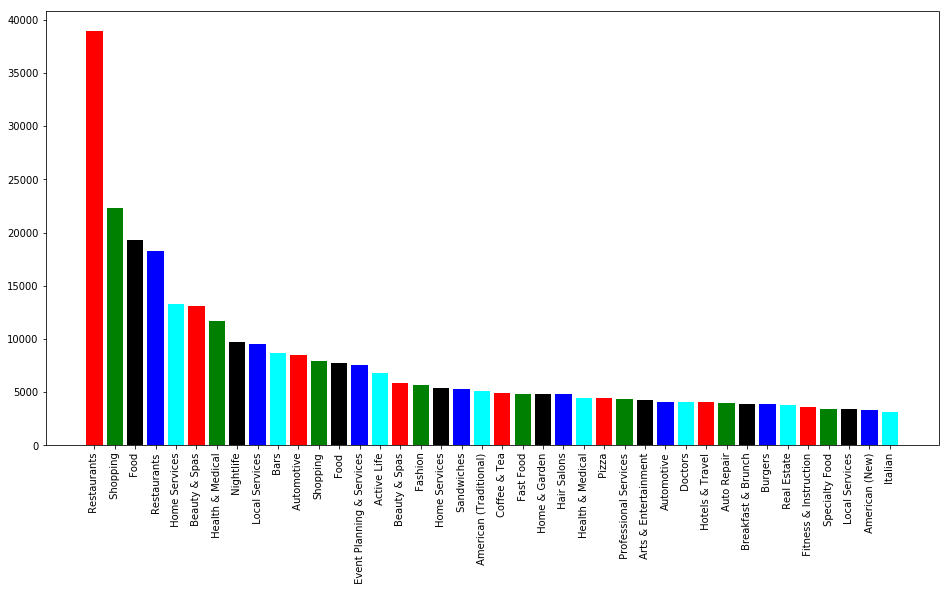

In [16]:
Categories={}

for x in business.categories:
    all_categories=x.split(",")
    for cat in all_categories:
        if cat not in Categories:
            Categories[cat]=1
        else:
            Categories[cat]+=1
All_categories=list(Categories.keys())
Cat_list=[[x,Categories[x]] for x in All_categories]

Cat_list=sorted(Cat_list, key=lambda x: x[1], reverse=True)
#LETS find the top 40 Categories of business
Cat_list=Cat_list[:40]
plt.bar(range(len(Cat_list)),[x[1] for x in Cat_list] ,align="center", color=['red', 'green','black', 'blue', 'cyan'])
plt.xticks(range(len(Cat_list)), [x[0] for x in Cat_list], rotation="vertical")
plt.show()

## star rating distribution 

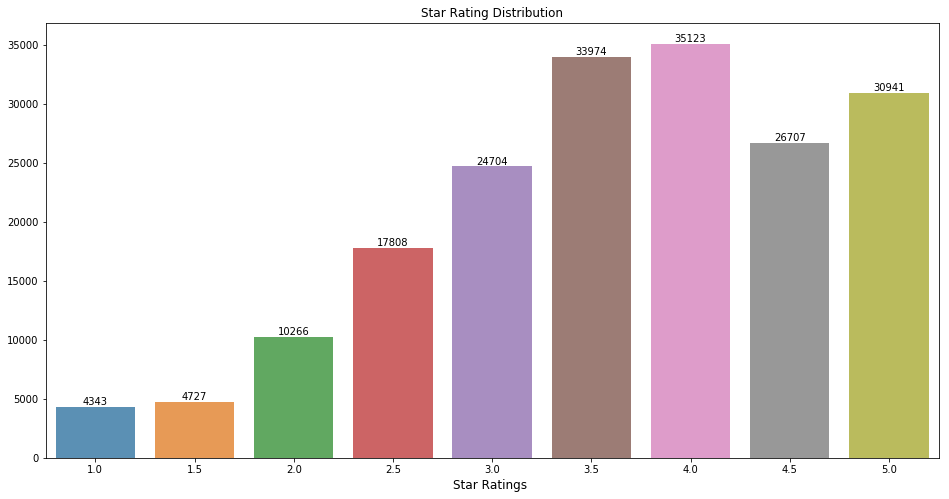

In [17]:
#Get the distribution of the ratings
x=business.stars.value_counts()
x=x.sort_index()
#plot
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

## top rated category

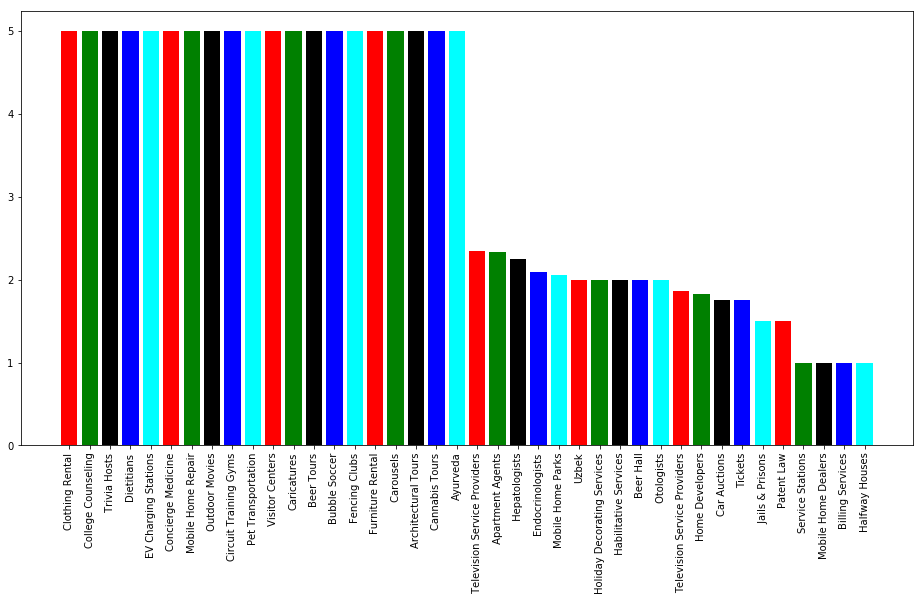

In [18]:
Categories_star={}
for i,x in business.iterrows():
    all_categories=x["categories"].split(",")
    for cat in all_categories:
        if cat not in Categories_star:
            Categories_star[cat]=[]
        Categories_star[cat].append(x["stars"])
Star_list=[]
for x in list(Categories_star.keys()):
    Star_list.append([x, np.mean(Categories_star[x])])
    
Star_list=sorted(Star_list, key=lambda x: x[1], reverse=True)
Star_list=Star_list[:20] + Star_list[len(Star_list)-20:]

plt.bar(range(len(Cat_list)),[x[1] for x in Star_list] ,align="center",color=['red', 'green','black', 'blue', 'cyan'])
plt.xticks(range(len(Cat_list)), [x[0] for x in Star_list], rotation="vertical")
plt.show()

## sum (rating per category)

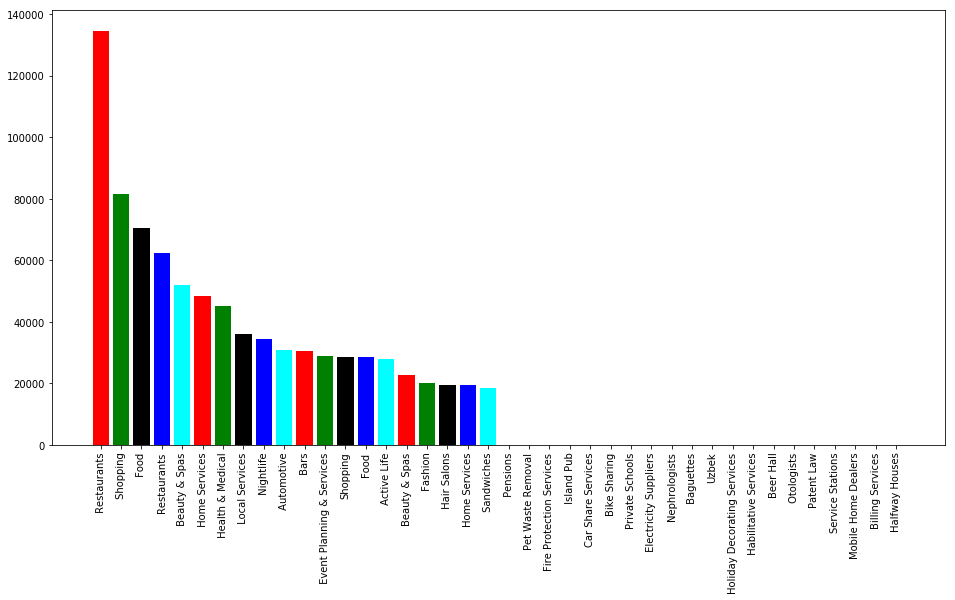

In [19]:
Star_list_sum=[]
for x in list(Categories_star.keys()):
    Star_list_sum.append([x, np.sum(Categories_star[x])])
    
Star_list_sum=sorted(Star_list_sum, key=lambda x: x[1], reverse=True)
Star_list_sum=Star_list_sum[:20] + Star_list_sum[len(Star_list_sum)-20:]

plt.bar(range(len(Star_list_sum)),[x[1] for x in Star_list_sum] ,align="center",color=['red', 'green','black', 'blue', 'cyan'])
plt.xticks(range(len(Star_list_sum)), [x[0] for x in Star_list_sum], rotation="vertical")
plt.show()

## top categories with reviews

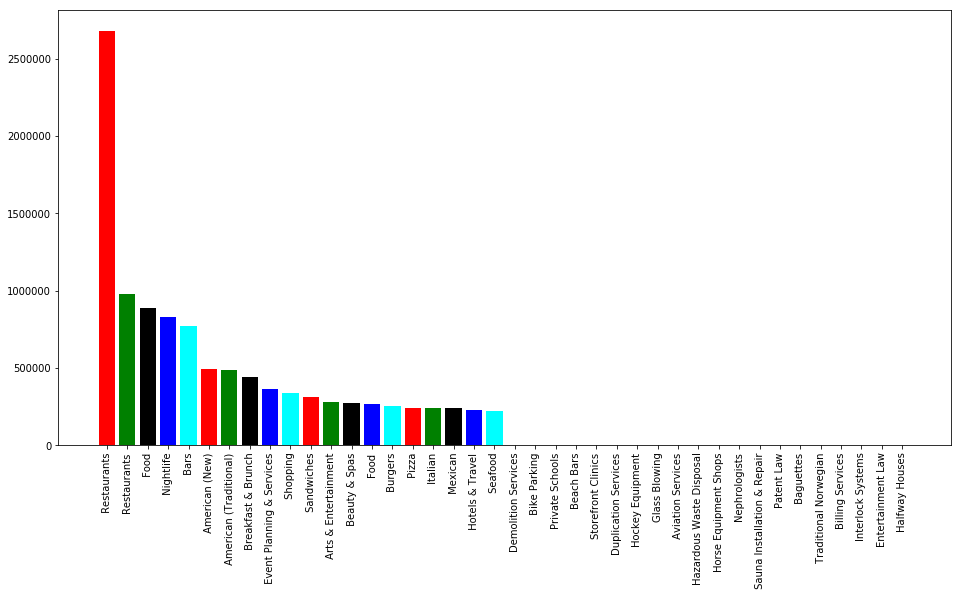

In [20]:
Categories_review={}
for i,x in business.iterrows():
    all_categories=x["categories"].split(",")
    for cat in all_categories:
        if cat not in Categories_review:
            Categories_review[cat]=[]
        Categories_review[cat].append(x["review_count"])
review_list=[]
for x in list(Categories_review.keys()):
    review_list.append([x, np.sum(Categories_review[x])])
    
review_list=sorted(review_list, key=lambda x: x[1], reverse=True)
review_list=review_list[:20] + review_list[len(review_list)-20:]

plt.bar(range(len(review_list)),[x[1] for x in review_list] ,align="center",color=['red', 'green','black', 'blue', 'cyan'])
plt.xticks(range(len(review_list)), [x[0] for x in review_list], rotation="vertical")
plt.show()

## Location analysis

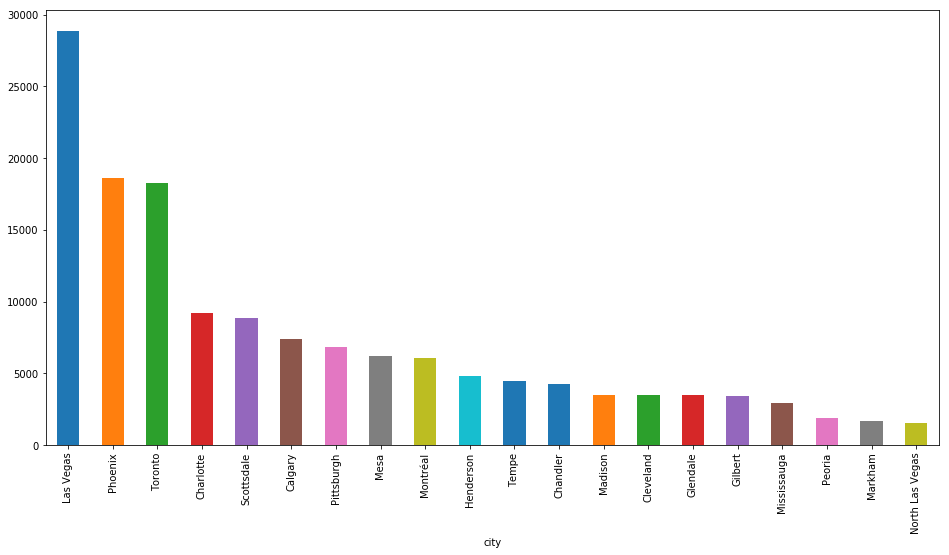

In [21]:
business.city.groupby([business.city]).count().sort_values()[::-1][:20].plot.bar()

## cities with best rating

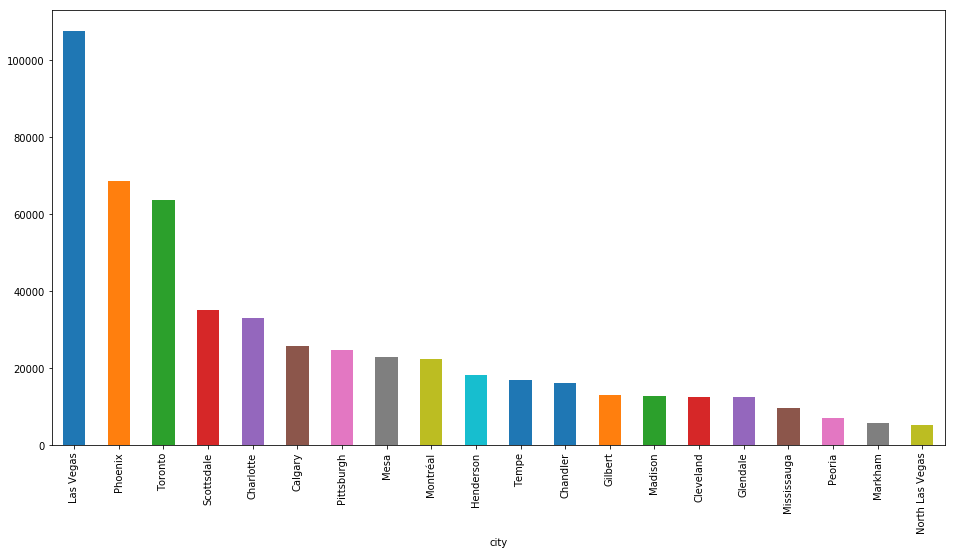

In [22]:
business.groupby(['city'])['stars'].sum().sort_values()[::-1][:20].plot.bar()

### Geometry analysis

In [23]:
from shapely.geometry import Point,Polygon
import geopandas as gpd

In [24]:
geometry=[Point(xy) for xy in zip (business.longitude, business.latitude)]

In [25]:

crs={'init':'epsg:4326'}
business_geo_df=gpd.GeoDataFrame(business,crs=crs, geometry=geometry)
business_geo_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,geometry
0,1314 44 Avenue NE,"{'RestaurantsReservations': 'True', 'Restauran...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Tuesday': '11:0-21:0', 'Thursday': '11:0-21:...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB,POINT (-114.031674872 51.0918130155)
1,,"{'RestaurantsReservations': 'False', 'BikePark...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV,POINT (-114.939821 35.9607337)
2,1335 rue Beaubien E,"{'RestaurantsReservations': 'True', 'BikeParki...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Tuesday': '10:0-22:0', 'Thursday': '10:0-22:...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC,POINT (-73.5993003 45.5405031)
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ,POINT (-112.0769793 33.4499993)
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB,POINT (-114.0273656 51.0355914)


In [26]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [27]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


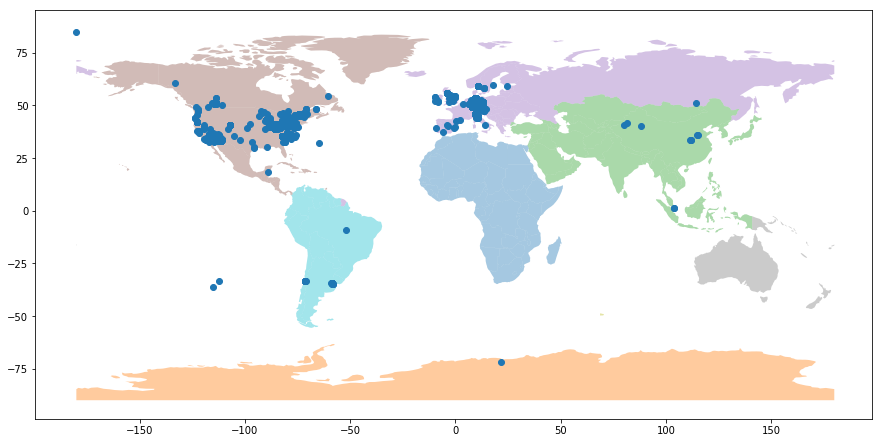

In [28]:
fig,ax=plt.subplots(figsize=(15,15))
world.plot(ax=ax, alpha=0.4, column='continent',label=True)
business_geo_df.plot(ax=ax)

### top business location 

In [29]:
top_business=business_geo_df[business_geo_df["stars"]>3]

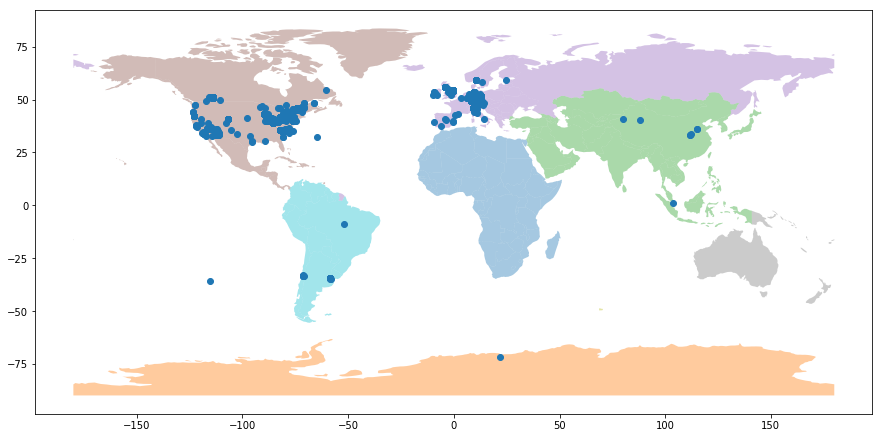

In [30]:
fig,ax=plt.subplots(figsize=(15,15))
world.plot(ax=ax, alpha=0.4, column='continent',label=True)
top_business.plot(ax=ax)

### worst business 

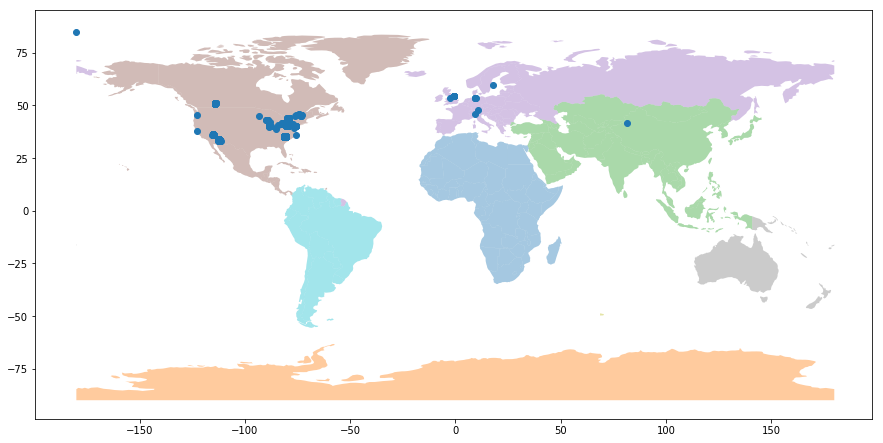

In [31]:
worst_business=business_geo_df[business_geo_df["stars"]<2]
fig,ax=plt.subplots(figsize=(15,15))
world.plot(ax=ax, alpha=0.4, column='continent',label=True)
worst_business.plot(ax=ax)

## common words 

In [32]:
### first e need to merge business and reviews
merged_br_df = business.merge(reviews, on=('business_id'), suffixes=('_l', '_r'))

In [33]:
merged_br_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,state,geometry,cool,date,funny,review_id,stars_r,text,useful,user_id
0,1314 44 Avenue NE,"{'RestaurantsReservations': 'True', 'Restauran...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Tuesday': '11:0-21:0', 'Thursday': '11:0-21:...",1,51.091813,-114.031675,Minhas Micro Brewery,...,AB,POINT (-114.031674872 51.0918130155),0,2014-08-21,0,twCy6q-VJ2wunPzLHysHBg,4,Great place. Major flaw is how early it closes...,0,sKexIMFNAlFeuXl2KW6rjw
1,1314 44 Avenue NE,"{'RestaurantsReservations': 'True', 'Restauran...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Tuesday': '11:0-21:0', 'Thursday': '11:0-21:...",1,51.091813,-114.031675,Minhas Micro Brewery,...,AB,POINT (-114.031674872 51.0918130155),0,2015-06-15,0,5fb4JYLFtZ-b3EdRaAPmTQ,5,The best fresh pizza and selection of micro br...,0,ebActGRuC2wr4GeqRstRJQ
2,1314 44 Avenue NE,"{'RestaurantsReservations': 'True', 'Restauran...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Tuesday': '11:0-21:0', 'Thursday': '11:0-21:...",1,51.091813,-114.031675,Minhas Micro Brewery,...,AB,POINT (-114.031674872 51.0918130155),0,2017-06-17,0,CHm6DMhPFSM9EU8uDlpWbQ,3,Bought the Groupon for four people and pizza. ...,0,TakhclDII1B1q5qfdWLIWQ
3,1314 44 Avenue NE,"{'RestaurantsReservations': 'True', 'Restauran...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Tuesday': '11:0-21:0', 'Thursday': '11:0-21:...",1,51.091813,-114.031675,Minhas Micro Brewery,...,AB,POINT (-114.031674872 51.0918130155),2,2014-06-01,1,V-SACeYnMPSwK8KmSH-Jng,4,We went to Minhas with a coupon for a free piz...,4,zoMRgX9-o0aNugob1G8Zeg
4,1314 44 Avenue NE,"{'RestaurantsReservations': 'True', 'Restauran...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Tuesday': '11:0-21:0', 'Thursday': '11:0-21:...",1,51.091813,-114.031675,Minhas Micro Brewery,...,AB,POINT (-114.031674872 51.0918130155),0,2018-04-07,0,QTKoABO2du2KKa9uNFnabg,4,Michael was an awesome tour guide. Learned a l...,0,RqruhCY7W3AsxDGz_yYCYw


In [34]:
from wordcloud import WordCloud

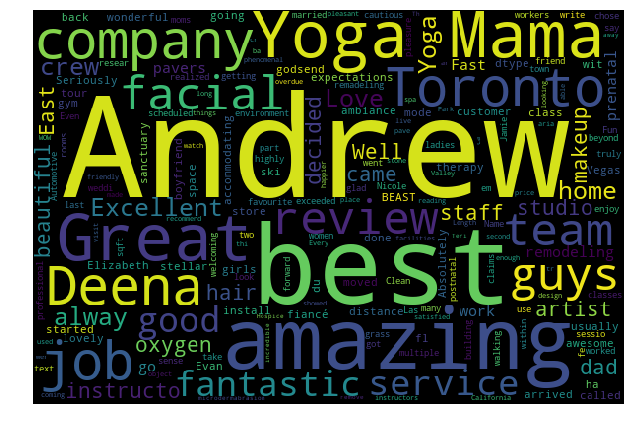

In [35]:
# Generate a word cloud image for positive reviews
text=merged_br_df.text[merged_br_df['stars_l']==5]
polarity_pos_wordcloud = WordCloud(width=600, height=400).generate(str(text))
plt.figure( figsize=(9,9))
plt.imshow(polarity_pos_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

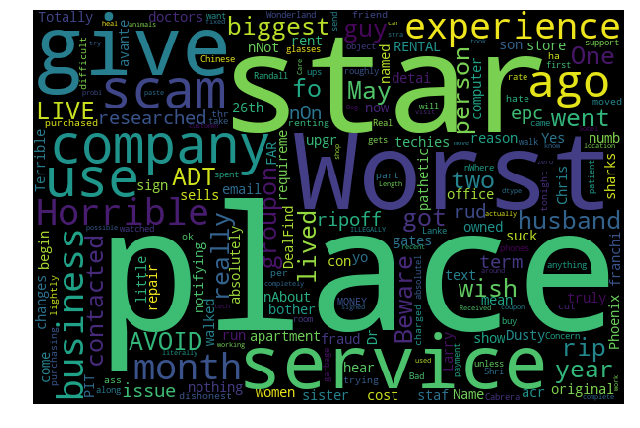

In [36]:
# Generate a word cloud image for positive reviews
text=merged_br_df.text[merged_br_df['stars_l']==1]
polarity_pos_wordcloud = WordCloud(width=600, height=400).generate(str(text))
plt.figure( figsize=(9,9))
plt.imshow(polarity_pos_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

In [37]:
# import adjustText as aT

# # Here we lay down the basic map of South Africa
# ax = world.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

# # Here we plot the provinces, with the rule being "highest score trumps"
# business_geo_df.plot(ax = ax,)

# # Here we plot the towns, and their individual assessment scores by color
# plt.scatter(business["longitude"], business["latitude"])

# plt.title("Assessment results by location - number of staff (South Africa)", size = 14)

# # Now we plot the texts for each scatter point using the "Label" column defined earlier
# texts = []
# for x, y, label in zip(business_geo_df.geometry.x, business_geo_df.geometry.y, business_geo_df["city"]):
#     texts.append(plt.text(x, y, label))

# # And NOW we adjust those points so that they no longer overlap
# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

# # The figure is then saved at a good resolution for presenting
# plt.savefig("assess_za.png", dpi = 800)

# Checkin Data

In [38]:
checkin = pd.read_json('../yelp_json/yelp_academic_dataset_checkin.json', orient='columns',lines=True)
checkin.head()

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Tue-14': 1, 'Mon-4': 1, 'Thu-11': 1, 'Sun-3'..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Wed-17': 1, 'Mon-13': 1, 'Sat-21': 1, 'Sun-1..."
2,tJRDll5yqpZwehenzE2cSg,"{'Mon-1': 1, 'Fri-23': 1, 'Thu-0': 1, 'Mon-12'..."
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Mon-20': 1, 'Fri-18': 1, 'Sun-14': 1}"
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Thu-23': 1, 'Sat-23..."


In [39]:
temp = []
for days in checkin["time"]:
    count=0
    for key, value in days.items():
        
        count = count + int(value)
    temp.append(count)

checkin["checkin_count"] = temp
checkin.head()

,business_id,time,checkin_count
0,7KPBkxAOEtb3QeIL9PEErg,"{'Tue-14': 1, 'Mon-4': 1, 'Thu-11': 1, 'Sun-3'...",151
1,kREVIrSBbtqBhIYkTccQUg,"{'Wed-17': 1, 'Mon-13': 1, 'Sat-21': 1, 'Sun-1...",7
2,tJRDll5yqpZwehenzE2cSg,"{'Mon-1': 1, 'Fri-23': 1, 'Thu-0': 1, 'Mon-12'...",6
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Mon-20': 1, 'Fri-18': 1, 'Sun-14': 1}",3
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Thu-23': 1, 'Sat-23...",5


In [40]:
checkin.sort_values(by=['checkin_count'],ascending=False)

,business_id,time,checkin_count
14299,FaHADZARwnY4yvlvpnsfGA,"{'Tue-14': 867, 'Mon-4': 1123, 'Fri-2': 1186, ...",138477
24463,JmI9nslLD7KZqRr__Bg6NQ,"{'Tue-14': 938, 'Mon-4': 1220, 'Fri-2': 1263, ...",118185
7008,yQab5dxZzgBLTEHCw9V7_w,"{'Tue-14': 434, 'Mon-4': 71, 'Fri-2': 271, 'Mo...",52675
20097,5LNZ67Yw9RD6nf4_UhXOjw,"{'Tue-14': 70, 'Mon-4': 334, 'Fri-2': 370, 'Mo...",45416
119434,IZivKqtHyz4-ts8KsnvMrA,"{'Mon-4': 549, 'Fri-2': 348, 'Mon-1': 429, 'We...",36327
18713,SMPbvZLSMMb7KU76YNYMGg,"{'Tue-14': 81, 'Mon-4': 216, 'Fri-2': 245, 'Mo...",33733
15620,Wxxvi3LZbHNIDwJ-ZimtnA,"{'Tue-14': 48, 'Mon-4': 220, 'Fri-2': 227, 'Mo...",31591
15613,na4Th5DrNauOv-c43QQFvA,"{'Tue-14': 70, 'Mon-4': 318, 'Fri-2': 226, 'Mo...",30339
15626,El4FC8jcawUVgw_0EIcbaQ,"{'Tue-14': 67, 'Mon-4': 228, 'Fri-2': 228, 'Mo...",29318
16173,VyjyHoBg3KC5BSFRlD0ZPQ,"{'Tue-14': 44, 'Mon-4': 238, 'Fri-2': 234, 'Mo...",28427


# Merge business and checkin 

In [41]:
merged_df = business.merge(checkin, on=('business_id'), suffixes=('_l', '_r'))
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157075 entries, 0 to 157074
Data columns (total 18 columns):
address          157075 non-null object
attributes       141475 non-null object
business_id      157075 non-null object
categories       157075 non-null object
city             157075 non-null object
hours            120342 non-null object
is_open          157075 non-null int64
latitude         157072 non-null float64
longitude        157073 non-null float64
name             157075 non-null object
neighborhood     157075 non-null object
postal_code      157075 non-null object
review_count     157075 non-null int64
stars            157075 non-null float64
state            157075 non-null object
geometry         157075 non-null object
time             157075 non-null object
checkin_count    157075 non-null int64
dtypes: float64(3), int64(3), object(12)
memory usage: 22.8+ MB
